In [ ]:
Problem statement Use one feature as Tv to predict a sale

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load the dataset 
df = pd.read_csv('Advertising.csv')

In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [7]:
# Select one feature (TV) and the target (Sales)
X = df[['TV']]       # Feature
y = df['sales']      # Target

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create and train the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# Predict on test data
y_pred = knn.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 11.691777777777776


In [13]:
# Predict sales for a new ad budget (e.g., TV = 150)
new_input = [[150]]
predicted_sales = knn.predict(new_input)
print(f"Predicted Sales for TV = 150: {predicted_sales[0]:.2f}")

Predicted Sales for TV = 150: 15.30


c:\Users\ghong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


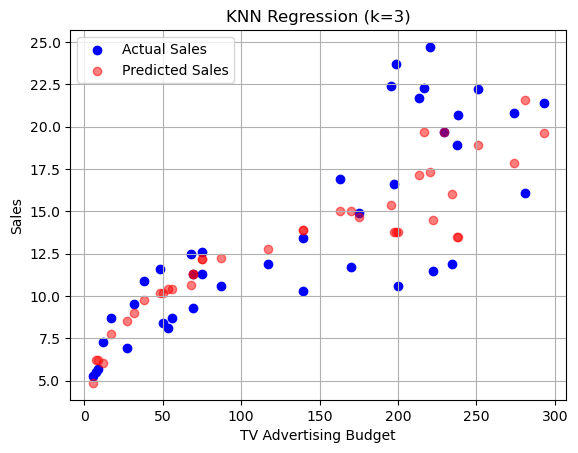

In [14]:
# Plot actual vs predicted sales
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test, y_pred, color='red', label='Predicted Sales', alpha=0.5)
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("KNN Regression (k=3)")
plt.legend()
plt.grid(True)
plt.show()